## Step-1 : Import required Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step-2 : Load dataset

In [11]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Step-3 : Data Preprocessing

In [12]:
df.isnull().sum() # checking missing values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# dropping the column which is not required for our analysis
df.drop("CustomerID",axis=1,inplace=True) # axis=1 represents column, and inPlace=True represents permanent delete of the column

In [16]:
df.drop("Gender",axis=1,inplace=True)

In [17]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


## Step-4 : EDA

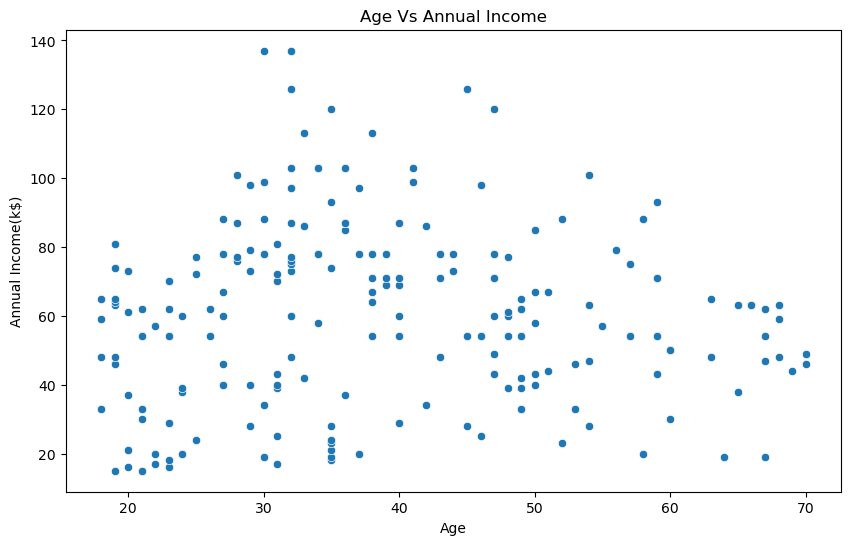

In [19]:
# scatter plot between age and annual income
plt.figure(figsize=(10,6))
sns.scatterplot(x="Age",y="Annual Income (k$)",data=df)
plt.title("Age Vs Annual Income")
plt.xlabel("Age")
plt.ylabel("Annual Income(k$)")
plt.show()

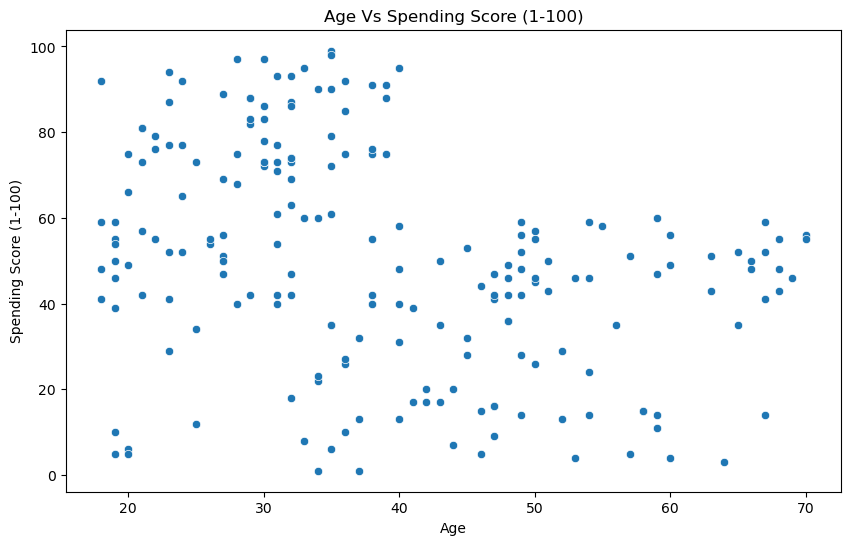

In [20]:
# scatter plot between age and Spending Score (1-100)
plt.figure(figsize=(10,6))
sns.scatterplot(x="Age",y="Spending Score (1-100)",data=df)
plt.title("Age Vs Spending Score (1-100)")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

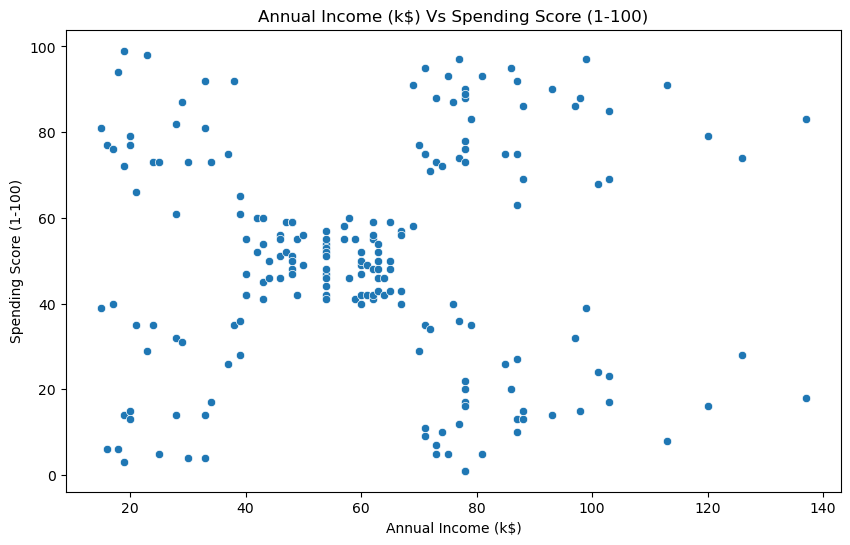

In [21]:
# scatter plot between Annual Income (k$) and Spending Score (1-100)
plt.figure(figsize=(10,6))
sns.scatterplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=df)
plt.title("Annual Income (k$) Vs Spending Score (1-100)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

## Step-5 : Feature Engineering

In [22]:
df.skew()

Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [24]:
print("Skewness of age is :",df['Age'].skew())
print("Skewness of Annual Income is :",df['Annual Income (k$)'].skew())
print("Skewness of Annual Income is :",df['Spending Score (1-100)'].skew())


Skewness of age is : 0.48556885096681657
Skewness of Annual Income is : 0.3218425498619055
Skewness of Annual Income is : -0.047220201374263374


In [26]:
def skewness_name(skewness):
    if skewness > 0 :
        return "Right Skewed"
    elif skewness < 0 :
        return "Left Skewed"
    else:
        return "Normal"

print("Skewness of Age :",skewness_name(df['Age'].skew()))
print("Skewness of Annual Income is :",skewness_name(df['Annual Income (k$)'].skew()))
print("Skewness of Annual Income is :",skewness_name(df['Spending Score (1-100)'].skew()))


Skewness of Age : Right Skewed
Skewness of Annual Income is : Right Skewed
Skewness of Annual Income is : Left Skewed


In [28]:
# applying standardization to the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df = pd.DataFrame(scaled_data,columns=df.columns)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


## Step-6 : Train the model using k-means clustering

In [30]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5,random_state=42)
kmeans.fit(df)
df["Cluster"] = kmeans.labels_
df.head()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.424569,-1.738999,-0.434801,2
1,-1.281035,-1.738999,1.195704,2
2,-1.352802,-1.700830,-1.715913,3
3,-1.137502,-1.700830,1.040418,2
4,-0.563369,-1.662660,-0.395980,2


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

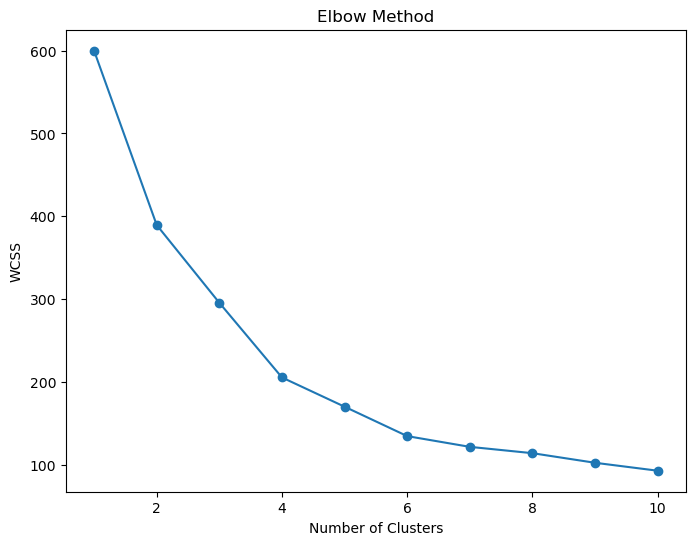

In [35]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(df.drop(columns='Cluster'))
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcss,marker='o')
plt.title('Elbow Method')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

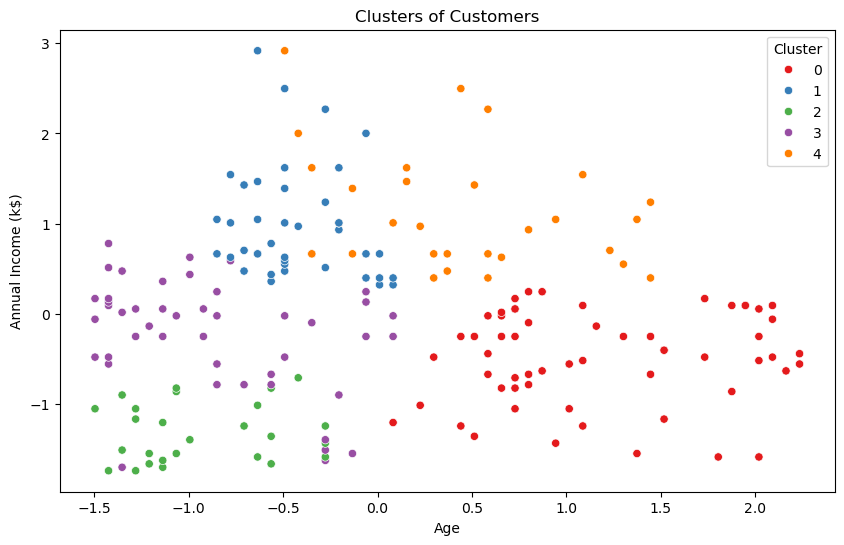

In [36]:
# Display clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x="Age",y="Annual Income (k$)",hue='Cluster', data=df, palette='Set1')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend(title='Cluster')
plt.show()

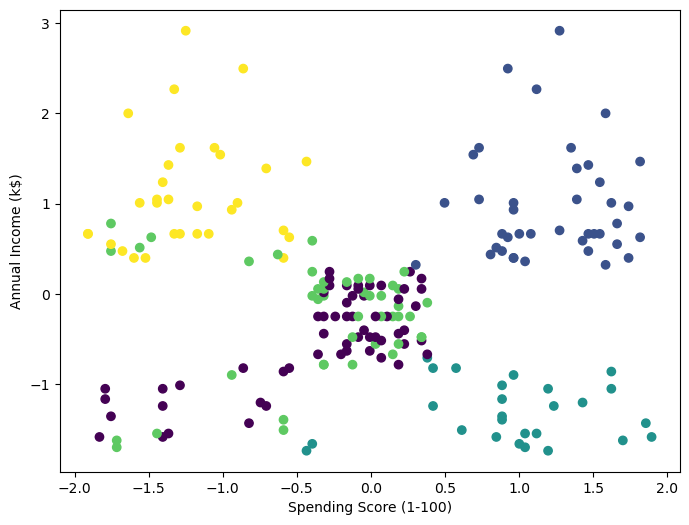

In [41]:
plt.figure(figsize=(8,6))
plt.scatter(df["Spending Score (1-100)"],
df["Annual Income (k$)"],
c = df["Cluster"]
)
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.show()

In [40]:
df.to_csv("clustered_mall_customers.csv",index=False)